<a href="https://colab.research.google.com/github/RolleRolle/CarND-Camera-Calibration/blob/master/opencv_detect_aruco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

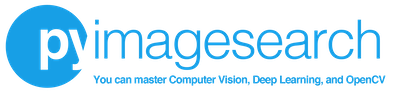

# Detecting ArUco markers with OpenCV and Python

### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [Detecting ArUco markers with OpenCV and Python](https://www.pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/) blog post published on 12-21-20.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible joining PyImageSearch Plus at [http://pyimg.co/plus/](http://pyimg.co/plus) today.*

### Download the code zip file

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-detect-aruco/opencv-detect-aruco.zip
!unzip -qq opencv-detect-aruco.zip
%cd opencv-detect-aruco

## Blog Post Code

### Import Packages

In [ ]:
# import the necessary packages
from imutils.video import VideoStream
import matplotlib.pyplot as plt
import argparse
import imutils
import time
import cv2
import sys

### Function to display images in Jupyter Notebooks and Google Colab

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Detecting ArUco markers with OpenCV in images

In [ ]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image containing ArUCo tag")
# ap.add_argument("-t", "--type", type=str,
# 	default="DICT_ARUCO_ORIGINAL",
# 	help="type of ArUCo tag to detect")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/example_01.png",
    "type": "DICT_5X5_100",
}

In [ ]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [ ]:
# load the input image from disk and resize it
print("[INFO] loading image...")
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)

# verify that the supplied ArUCo tag exists and is supported by
# OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(
		args["type"]))
	sys.exit(0)

# load the ArUCo dictionary, grab the ArUCo parameters, and detect
# the markers
print("[INFO] detecting '{}' tags...".format(args["type"]))
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]])
arucoParams = cv2.aruco.DetectorParameters_create()
(corners, ids, rejected) = cv2.aruco.detectMarkers(image, arucoDict,
	parameters=arucoParams)

In [ ]:
# verify *at least* one ArUco marker was detected
if len(corners) > 0:
	# flatten the ArUco IDs list
	ids = ids.flatten()

	# loop over the detected ArUCo corners
	for (markerCorner, markerID) in zip(corners, ids):
		# extract the marker corners (which are always returned in
		# top-left, top-right, bottom-right, and bottom-left order)
		corners = markerCorner.reshape((4, 2))
		(topLeft, topRight, bottomRight, bottomLeft) = corners

		# convert each of the (x, y)-coordinate pairs to integers
		topRight = (int(topRight[0]), int(topRight[1]))
		bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
		bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
		topLeft = (int(topLeft[0]), int(topLeft[1]))

		# draw the bounding box of the ArUCo detection
		cv2.line(image, topLeft, topRight, (0, 255, 0), 2)
		cv2.line(image, topRight, bottomRight, (0, 255, 0), 2)
		cv2.line(image, bottomRight, bottomLeft, (0, 255, 0), 2)
		cv2.line(image, bottomLeft, topLeft, (0, 255, 0), 2)

		# compute and draw the center (x, y)-coordinates of the ArUco
		# marker
		cX = int((topLeft[0] + bottomRight[0]) / 2.0)
		cY = int((topLeft[1] + bottomRight[1]) / 2.0)
		cv2.circle(image, (cX, cY), 4, (0, 0, 255), -1)

		# draw the ArUco marker ID on the image
		cv2.putText(image, str(markerID),
			(topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 0), 2)
		print("[INFO] ArUco marker ID: {}".format(markerID))

		# show the output image
		plt_imshow("Image", image)

### Detecting ArUco markers in real-time video streams with OpenCV

In [9]:
# first, let's download a sample video we will use to detect ArUco markers
!wget https://colab-notebook-videos.s3-us-west-2.amazonaws.com/aruco_sample.mp4

--2021-09-28 13:43:32--  https://colab-notebook-videos.s3-us-west-2.amazonaws.com/aruco_sample.mp4
Resolving colab-notebook-videos.s3-us-west-2.amazonaws.com (colab-notebook-videos.s3-us-west-2.amazonaws.com)... 52.218.176.17
Connecting to colab-notebook-videos.s3-us-west-2.amazonaws.com (colab-notebook-videos.s3-us-west-2.amazonaws.com)|52.218.176.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10835110 (10M) [video/mp4]
Saving to: ‘aruco_sample.mp4’

aruco_sample.mp4    100%[===================>]  10.33M  5.82MB/s    in 1.8s    

2021-09-28 13:43:34 (5.82 MB/s) - ‘aruco_sample.mp4’ saved [10835110/10835110]



In [22]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-t", "--type", type=str,
# 	default="DICT_ARUCO_ORIGINAL",
# 	help="type of ArUCo tag to detect")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "type": "DICT_ARUCO_ORIGINAL",
    "video": "WIN_20210928_15_53_21_Pro.mp4",
    "output": "output.avi"
}

In [23]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [24]:
# verify that the supplied ArUCo tag exists and is supported by
# OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(
		args["type"]))
	sys.exit(0)

# load the ArUCo dictionary and grab the ArUCo parameters
print("[INFO] detecting '{}' tags...".format(args["type"]))
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]])
arucoParams = cv2.aruco.DetectorParameters_create()

# initialize the video stream, pointer to output video file, and
# frame dimensions
vs = cv2.VideoCapture(args["video"])
writer = None
(W, H) = (None, None)

# try to determine the total number of frames in the video file
try:
	prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
		else cv2.CAP_PROP_FRAME_COUNT
	total = int(vs.get(prop))
	print("[INFO] {} total frames in video".format(total))

# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

[INFO] detecting 'DICT_ARUCO_ORIGINAL' tags...
[INFO] 311 total frames in video


In [25]:
# loop over the frames from the video stream
while True:
	# read the next frame from the file
	(grabbed, frame) = vs.read()
 
	# if the frame was not grabbed, then we have reached the end
	# of the stream
	if not grabbed:
		break

	# resize the frame to have a maximum width of 600 pixels
	frame = imutils.resize(frame, width=600)

	# detect ArUco markers in the input frame
	(corners, ids, rejected) = cv2.aruco.detectMarkers(frame,
		arucoDict, parameters=arucoParams)

	# verify *at least* one ArUco marker was detected
	if len(corners) > 0:
		# flatten the ArUco IDs list
		ids = ids.flatten()

		# loop over the detected ArUCo corners
		for (markerCorner, markerID) in zip(corners, ids):
			# extract the marker corners (which are always returned
			# in top-left, top-right, bottom-right, and bottom-left
			# order)
			corners = markerCorner.reshape((4, 2))
			(topLeft, topRight, bottomRight, bottomLeft) = corners

			# convert each of the (x, y)-coordinate pairs to integers
			topRight = (int(topRight[0]), int(topRight[1]))
			bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
			bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
			topLeft = (int(topLeft[0]), int(topLeft[1]))

			# draw the bounding box of the ArUCo detection
			cv2.line(frame, topLeft, topRight, (0, 255, 0), 2)
			cv2.line(frame, topRight, bottomRight, (0, 255, 0), 2)
			cv2.line(frame, bottomRight, bottomLeft, (0, 255, 0), 2)
			cv2.line(frame, bottomLeft, topLeft, (0, 255, 0), 2)

			# compute and draw the center (x, y)-coordinates of the
			# ArUco marker
			cX = int((topLeft[0] + bottomRight[0]) / 2.0)
			cY = int((topLeft[1] + bottomRight[1]) / 2.0)
			cv2.circle(frame, (cX, cY), 4, (0, 0, 255), -1)

			# draw the ArUco marker ID on the frame
			cv2.putText(frame, str(markerID),
				(topLeft[0], topLeft[1] - 15),
				cv2.FONT_HERSHEY_SIMPLEX,
				0.5, (0, 255, 0), 2)

	# check if the video writer is None
	if writer is None:
		# initialize our video writer
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 30,
			(frame.shape[1], frame.shape[0]), True)

	# write the output frame to disk
	writer.write(frame)

# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()

[INFO] cleaning up...


The above code block takes a while to complete its execution. If you are interested to view the video within Colab just execute the following code blocks. Note that it may be time-consuming. 

Our output video is produced in `.avi` format. First, we need to convert it to `.mp4` format. 

In [26]:
!ffmpeg -i "output.avi" output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [27]:
#@title Display video inline
from IPython.display import HTML
from base64 import b64encode

mp4 = open("output.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=700 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)

This code is referred from [this StackOverflow thread](https://stackoverflow.com/a/57378660/7636462). 

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Detecting ArUco markers with OpenCV and Python*](https://www.pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/) blog post published on 12-21-2020.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```